<a href="https://colab.research.google.com/github/KarthikAmuthuri/Assessments/blob/main/Fradulent_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will start by importing the necessary libraries for building our model:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will load the dataset into a pandas dataframe and explore its contents:

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data.shape

(1172840, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172840 entries, 0 to 1172839
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1172840 non-null  int64  
 1   type            1172840 non-null  object 
 2   amount          1172840 non-null  float64
 3   nameOrig        1172840 non-null  object 
 4   oldbalanceOrg   1172840 non-null  float64
 5   newbalanceOrig  1172840 non-null  float64
 6   nameDest        1172840 non-null  object 
 7   oldbalanceDest  1172840 non-null  float64
 8   newbalanceDest  1172839 non-null  float64
 9   isFraud         1172839 non-null  float64
 10  isFlaggedFraud  1172839 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 98.4+ MB



*   **isFraud** is the target column and rest are feature columns.
*   We will drop 'nameOrig' and 'nameDest' as we can not make any relationship with fraud and names

*   We need to convert type column into numeric
*   'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest; and 'newbalanceDest' to be normalized.










In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [7]:
data.dropna(inplace = True)

Data Visualization

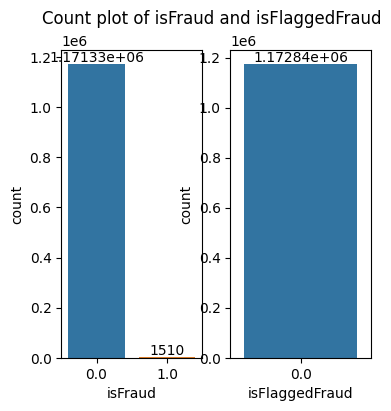

In [8]:
# Target class chart
plt.figure(figsize=(4,4))
plt.subplot(121)
ax = sns.countplot(data=data,x='isFraud')
ax.bar_label(ax.containers[0])

plt.subplot(122)
ax = sns.countplot(data=data,x='isFlaggedFraud')
ax.bar_label(ax.containers[0])

plt.suptitle('Count plot of isFraud and isFlaggedFraud')
plt.show()



*   It is an highly Imbalanced dataset.
*   This plot shows 8213 transactions are labelled as isFraud and only 16 transcations are labelled as isFlaggedFraud



In [9]:
#isFlaggeddraud transactions
data[data['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


We found that all the 16 isFlaggedFraud = 1 only for the type **"Transactions"**

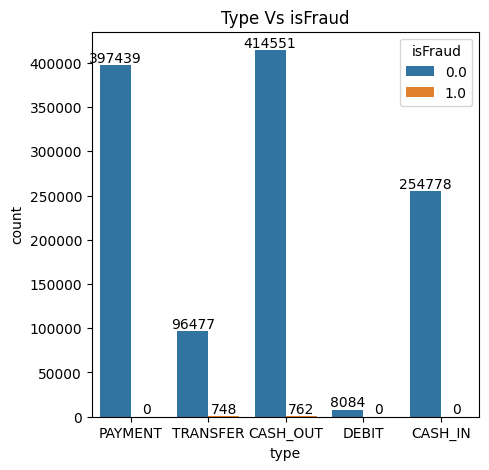

In [10]:
# Countplot of type feature
plt.figure(figsize=(5,5))
ax = sns.countplot(data=data,x='type',hue='isFraud')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('Type Vs isFraud')
plt.show()

*   From plot 'Transfer' and 'cash-out' types only have fraud transactions.
*   Only Transfer transactions are made 'isFlaggedFraud'



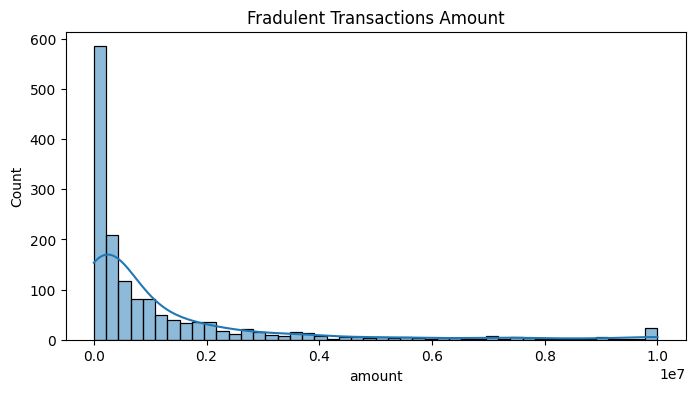

In [11]:
# Histogram of Amount feature based on fraud
plt.figure(figsize=(8,4))
sns.histplot(data=data[data['isFraud']==1],x='amount',kde=True)
plt.title('Fradulent Transactions Amount')
plt.show()

*   Most of the transactions lie below amount of around 200000




<ipython-input-12-972134726648>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True,cmap ='BuPu')


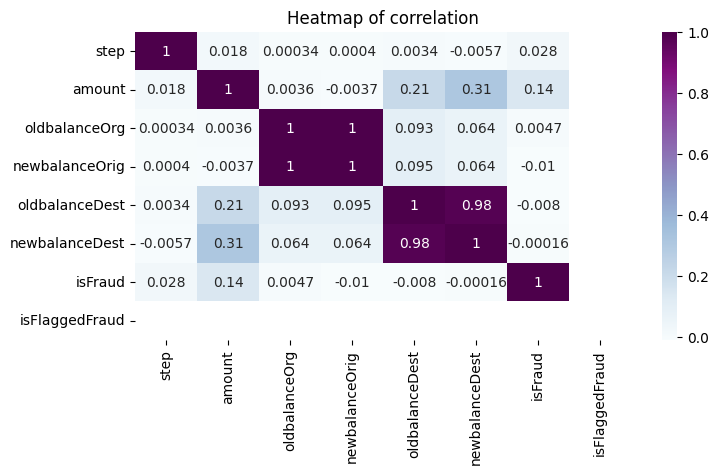

In [12]:
#Heatmap of correlations
plt.figure(figsize=(8,4))
sns.heatmap(data=data.corr(),annot=True,cmap ='BuPu')
plt.title('Heatmap of correlation')
plt.show()

#DataPreprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
# getting dummies for type feature for conversion
type_dummies = pd.get_dummies(data['type'],prefix='type',drop_first=True)

In [15]:
#adding dummies and removing type,nameOrig and nameDest
data_copy = pd.concat([data.drop(['type','nameOrig','nameDest'],axis=1),type_dummies],axis=1)

In [16]:
data_copy.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,1,0


In [17]:
# Splitting features and target 
X = data_copy.drop('isFraud',axis=1)
y = data_copy['isFraud']

In [18]:
# Splitting train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)

In [19]:
scaler = MinMaxScaler()

columns that are required for scaling are:
1.   step
2.   amount
3.   oldbalanceOrg
4.  newbalanceOrig
5. oldbalanceDest
6. newbalanceDest




In [20]:
col_req_scale = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [21]:
scaler.fit(X_train[col_req_scale])

MinMaxScaler()

In [22]:
X_train[col_req_scale] = scaler.transform(X_train[col_req_scale])
X_test[col_req_scale] = scaler.transform(X_test[col_req_scale])

###Model Building

In [23]:
from warnings import simplefilter
simplefilter("ignore")

LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [26]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.9988091583961438
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    351399
         1.0       1.00      0.08      0.14       453

    accuracy                           1.00    351852
   macro avg       1.00      0.54      0.57    351852
weighted avg       1.00      1.00      1.00    351852

Confusion matrix:
 [[351399      0]
 [   419     34]]


XGBClassifier

In [27]:
from xgboost import XGBClassifier

In [ ]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

From the models:


*   We observe that the accuracy scores are similar in all the models.
*   But from confusion matrix, we can say that XGBClassifier performs well on classifying the fraud transactions, so we use this technique for model building by fine tuning it further.



Since our target(isFraud = 1) class is minority class.

we use RandomUnderSampling technique to balance classes by under sampling the majority class to minority class.

Random under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
Rus = RandomUnderSampler()
X_Rus, y_Rus = Rus.fit_resample(X_train,y_train)

In [ ]:
xg_model.fit(X_Rus,y_Rus)
y_pred = xg_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

From the above results, we can observe that there is a slight drop in accuracy, but in confusion matrix we are able to maximize the predictions of isFraud = 1. 